# Benchmarks

In [16]:
import random
import numpy as np
import pandas as pd
import time
import functools
import sys

import matplotlib.pyplot as plt

import timeit
from timeit import Timer
import copy
from numba import jit

import warnings
warnings.filterwarnings('ignore')

#### Quadratic sorting algorithms

In [2]:
'''
Insertion sort
'''


@jit() 
def numba_insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]

        while j > 0 and A[j-1] > key:
            # Swap
            A[j], A[j-1] = A[j-1], A[j]
            j -= 1

def insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]

        while j > 0 and A[j-1] > key:
            # Swap
            A[j], A[j-1] = A[j-1], A[j]
            j -= 1
'''
Bubble sort
'''

@jit() 
def numba_bubble_sort(A):
    n = len(A)
    has_swapped = True
    num_rounds = 0

    while(has_swapped):
        has_swapped = False

        # Shortens end of list by n - kth iteration - 1
        for i in range(n - num_rounds - 1):

            if A[i] > A[i+1]:
                # Swap
                A[i], A[i+1] = A[i+1], A[i]
                has_swapped = True
        num_rounds += 1

def bubble_sort(A):
    n = len(A)
    has_swapped = True
    num_rounds = 0

    while(has_swapped):
        has_swapped = False

        # Shortens end of list by n - kth iteration - 1
        for i in range(n - num_rounds - 1):

            if A[i] > A[i+1]:
                # Swap
                A[i], A[i+1] = A[i+1], A[i]
                has_swapped = True
        num_rounds += 1

#### Subquadratic sorting alorithms

In [3]:
'''
Mergesort
'''

@jit()   
def numba_mergesort(values): 
    if len(A) > 1: 
        mid = int(len(A)/2) # Finding the mid of the array 
        left_array = A[:mid] # Dividing the array elements  
        right_array = A[mid:] # into 2 halves 
  
        mergesort(left_array) # Sorting the first half 
        mergesort(right_array) # Sorting the second half 
  

        # Merge process starts on lowest level first and completes finally at 
        # left_array[0:mid] and right_array[mid:len(A)], where mid is len(a)//2

        left_index = 0
        right_index = 0
        copy_index = 0
          
        
        while left_index < len(left_array) and right_index < len(right_array): 

            if left_array[left_index] < right_array[right_index]: 
                A[copy_index] = left_array[left_index] 
                left_index += 1

            else: 
                A[copy_index] = right_array[right_index] 
                right_index += 1

            copy_index += 1
          
        # Checking if elements are remaining in Left or Right
        # left_array is copied first since indexing(copy_index) goes from left to right
        while left_index < len(left_array): 

            A[copy_index] = left_array[left_index] 
            left_index += 1
            copy_index += 1
          
        while right_index < len(right_array): 

            A[copy_index] = right_array[right_index] 
            right_index += 1
            copy_index += 1
        
def mergesort(A):
    if len(A) > 1: 
        mid = int(len(A)/2) # Finding the mid of the array 
        left_array = A[:mid] # Dividing the array elements  
        right_array = A[mid:] # into 2 halves 
  
        mergesort(left_array) # Sorting the first half 
        mergesort(right_array) # Sorting the second half 
  

        # Merge process starts on lowest level first and completes finally at 
        # left_array[0:mid] and right_array[mid:len(A)], where mid is len(a)//2

        left_index = 0
        right_index = 0
        copy_index = 0
          
        
        while left_index < len(left_array) and right_index < len(right_array): 

            if left_array[left_index] < right_array[right_index]: 
                A[copy_index] = left_array[left_index] 
                left_index += 1

            else: 
                A[copy_index] = right_array[right_index] 
                right_index += 1

            copy_index += 1
          
        # Checking if elements are remaining in Left or Right
        # left_array is copied first since indexing(copy_index) goes from left to right
        while left_index < len(left_array): 

            A[copy_index] = left_array[left_index] 
            left_index += 1
            copy_index += 1
          
        while right_index < len(right_array): 

            A[copy_index] = right_array[right_index] 
            right_index += 1
            copy_index += 1
            
'''
Quicksort
'''

def swap(array, a, b):
    array[a], array[b] = array[b], array[a]
    return array

def partition(array, start, end):
    
    pivotindex = start
    pivotvalue = array[end]

    for left_index in range(start,end):
        if array[left_index] < pivotvalue:
            swap(array, left_index, pivotindex)
            pivotindex += 1
    swap(array, pivotindex, end)
    
    return array, pivotindex

def quick_sort(array, start, end):
    if start < end:
        array, index = partition(array, start, end)
        array = quick_sort(array, start, index-1)
        array = quick_sort(array, index+1, end)
        
    return array

def quicksort(array):
    array = quick_sort(array, 0, len(array)-1)

#### Combined algorithm

In [4]:
@jit()
def numba_mergesort_combined(A: list, 
                    threshold: int=11, 
                    comb_algo: str="insertion"
    ):
    """
    Mergesort combined with insertion sort

    args:
        threshold [int] : Number of elements before using insertion instead of mergesort,
                            defaults to 11.
        comb_algo [str] : Which algorithm to sort with. Defaults to insertion sort, currently if 
                            any other str is provideded, python inplace sort on list is implementeted.
    """

    if len(A) > threshold: 
        mid = int(len(A)/2) # Finding the mid of the array 
        left_array = A[:mid] # Dividing the array elements  
        right_array = A[mid:] # into 2 halves 
  
        mergesort_combined(
            left_array,
            threshold=threshold, 
            comb_algo=comb_algo
        ) 
        # Sorting the first half 

        mergesort_combined(
            right_array,
            threshold=threshold,
            comb_algo=comb_algo
        )
        # Sorting the second half 
  

        # Merge process starts on lowest level first and completes finally at 
        # left_array[0:mid] and right_array[mid:len(A)], where mid is len(a)//2

        left_index = 0
        right_index = 0
        copy_index = 0
          
        
        while left_index < len(left_array) and right_index < len(right_array): 

            if left_array[left_index] < right_array[right_index]: 
                A[copy_index] = left_array[left_index] 
                left_index += 1

            else: 
                A[copy_index] = right_array[right_index] 
                right_index += 1

            copy_index += 1
          
        # Checking if elements are remaining in Left or Right
        # left_array is copied first since indexing(copy_index) goes from left to right
        while left_index < len(left_array): 

            A[copy_index] = left_array[left_index] 
            left_index += 1
            copy_index += 1
          
        while right_index < len(right_array): 

            A[copy_index] = right_array[right_index] 
            right_index += 1
            copy_index += 1


    else:

        if comb_algo == "insertion":
            insertion_sort(A)
        else:
            A = np.sort(A)


def mergesort_combined(A: list, 
                    threshold: int=11, 
                    comb_algo: str="insertion"
    ):
    """
    Mergesort combined with insertion sort

    args:
        threshold [int] : Number of elements before using insertion instead of mergesort,
                            defaults to 11.
        comb_algo [str] : Which algorithm to sort with. Defaults to insertion sort, currently if 
                            any other str is provideded, python inplace sort on list is implementeted.
    """

    if len(A) > threshold: 
        mid = int(len(A)/2) # Finding the mid of the array 
        left_array = A[:mid] # Dividing the array elements  
        right_array = A[mid:] # into 2 halves 
  
        mergesort_combined(
            left_array,
            threshold=threshold, 
            comb_algo=comb_algo
        ) 
        # Sorting the first half 

        mergesort_combined(
            right_array,
            threshold=threshold,
            comb_algo=comb_algo
        )
        # Sorting the second half 
  

        # Merge process starts on lowest level first and completes finally at 
        # left_array[0:mid] and right_array[mid:len(A)], where mid is len(a)//2

        left_index = 0
        right_index = 0
        copy_index = 0
          
        
        while left_index < len(left_array) and right_index < len(right_array): 

            if left_array[left_index] < right_array[right_index]: 
                A[copy_index] = left_array[left_index] 
                left_index += 1

            else: 
                A[copy_index] = right_array[right_index] 
                right_index += 1

            copy_index += 1
          
        # Checking if elements are remaining in Left or Right
        # left_array is copied first since indexing(copy_index) goes from left to right
        while left_index < len(left_array): 

            A[copy_index] = left_array[left_index] 
            left_index += 1
            copy_index += 1
          
        while right_index < len(right_array): 

            A[copy_index] = right_array[right_index] 
            right_index += 1
            copy_index += 1


    else:

        if comb_algo == "insertion":
            insertion_sort(A)
        else:
            A = np.sort(A)

#### Number generator

In [5]:
def random_int_generator(length):
    """Creates list of integers of given length - with random order"""
    return list((np.random.randint(-length, length, size=length)))

def random_float_generator(length):
    """Creates list of decimal numbers of given length - with random order"""
    return list((np.random.uniform(-length, length, size=length)))

def ordered_generator(length):
    """Creates list of numbers of given length - with acsending order"""
    return list(np.arange(1, length))

def reversed_generator(length):
    """Creates list of numbers of given length - with descending order"""
    return list(np.flipud(ordered_generator(length)))

def string_generator(length):
  """Creates list of numbers of given length - with descending order"""

In [6]:
#print(random_int_generator(10))
#print(random_float_generator(10))
#print(ordered_generator(10))
#print(reversed_generator(10))

### Benchmark functions

In [ ]:
def benchmark(algorithm, given_list):
    """ Returns the runtime of a sorting algorithim on a given list."""
    
    rng = np.random.default_rng(12235) 
    clock = timeit.Timer(stmt='sort_func(copy(data))', globals={'sort_func': algorithm,
                                                                'data': given_list , 'copy': copy.copy})
    n_ar, t_ar = clock.autorange()
    t = clock.repeat(repeat=2, number=n_ar)
    return np.average(t)/n_ar

In [ ]:
def benchmark_algos_and_types(algorithm, list_size):
    """ Returns the time for given list type and return a dictionary with the results. """
    
    integer_results = [( _ , benchmark(algorithm, random_int_generator(_))) 
                      for _ in range(0, list_size, 50)]
    
    float_results = [( _ , benchmark(algorithm, random_float_generator(_))) 
                     for _ in range(0, list_size, 50)]
    
    ascending_results = [( _ , benchmark(algorithm, ordered_generator(_))) 
                         for _ in range(0, list_size, 50)]
    
    descending_result = [( _ , benchmark(algorithm, reversed_generator(_))) 
                         for _ in range(0, list_size, 50)]
    
    
    all_results = {'Random integers' : integer_results, 
                   'Random float' : float_results, 
                   'Ascending integers' : ascending_results,
                   'Descending integers' : descending_result}
    
    return all_results

### Plotting

In [ ]:
def plot_algorithms_benchmark(algorithm, list_size):
    """ Plots the runtime for the different list types. """
    
    results = benchmark_algos_and_types(algorithm, list_size)
    plt.figure(figsize=(84/25.4, 80/25.4))
    for typ in results:
        size, time = zip(*results[typ])
        plt.plot(size, time, label = typ)
        plt.title(algorithm.__name__)
        plt.xlabel('Number of items (n)')
        plt.ylabel('Runtime depending on n')
        plt.legend()

#### Comparing numba insertion sort to normal insertion sort

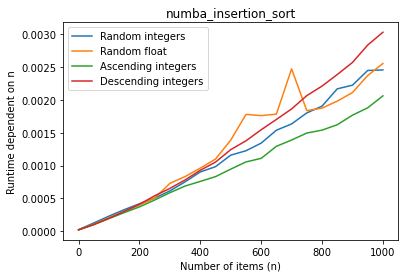

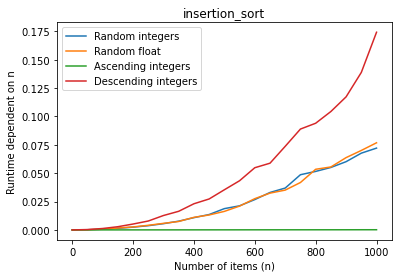

In [32]:
algorithms = [numba_insertion_sort, insertion_sort]

for algo in algorithms:
    plot_algorithms_benchmark(algo, 1001)
    plt.savefig(f'{algo.__name__}.png', bbox_inches='tight')

### Quadratic, subquadratic and combined algorithms with different lists

In [39]:
tic = time.time()

In [ ]:
#algorithms = [insertion_sort, bubble_sort, mergesort, quicksort, mergesort_combined]

algorithms = [insertion_sort, mergesort]

for algo in algorithms:
    plot_algorithms_benchmark(algo, 1001)
    plt.savefig(f'{algo.__name__}.png', bbox_inches='tight')

In [ ]:
toc = time.time()
print(f"Done in {(toc - tic):.1f} seconds")

#### Numba

In [ ]:
tic = time.time()

In [ ]:
# Trying numba on all functions

algorithms = [numba_insertion_sort, numba_bubble_sort, numba_mergesort, numba_mergesort_combined]
    
for algo in algorithms:
    plot_algorithms_benchmark(algo, 1001)
    plt.savefig(f'{algo.__name__}.png', bbox_inches='tight')

In [ ]:
toc = time.time()
print(f"Done in {(toc - tic):.1f} seconds")

Numba hugely increases the efficiency of the sorting algorithms. 

### Quadratic sorting algorithms: insertion sort vs bubble sort

In [60]:
def benchmark_quadratic(gen_type, list_size):
    """ Returns the time for given list type and return a dictionary with the results. """
    
    insertion_sort_results = [( _ , benchmark(numba_insertion_sort, gen_type(_))) 
                      for _ in range(0, list_size, 50)]
    
    bubble_sort_results = [( _ , benchmark(numba_bubble_sort, gen_type(_))) 
                     for _ in range(0, list_size, 50)]
     
    all_results = {'Insertion sort' : insertion_sort_results, 
                   'Bubble sort' : bubble_sort_results}
    
    return all_results

In [61]:
def plot_quadratic_benchmark(generator, list_size):
    """ Plots the runtime for the different list types. """
    
    results = benchmark_quadratic(generator, list_size)
    plt.figure()
    for typ in results:
        size, time = zip(*results[typ])
        plt.plot(size, time, label = typ)
        plt.title(generator.__name__)
        plt.xlabel('Number of items (n)')
        plt.ylabel('Runtime depending on n')
        plt.legend()

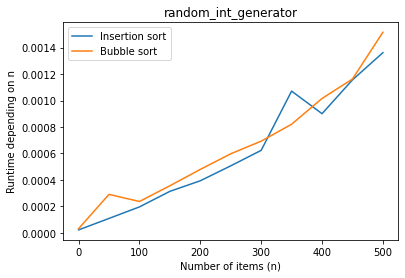

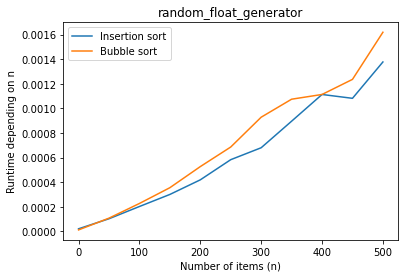

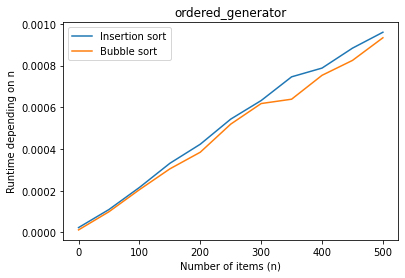

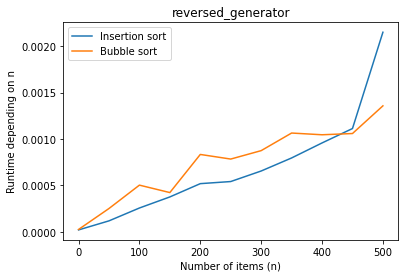

In [62]:
gen_types = [random_int_generator, random_float_generator, ordered_generator, reversed_generator]

for generator in gen_types:
    plot_quadratic_benchmark(generator, 501)
    plt.savefig(f'{generator.__name__}.png', bbox_inches='tight')

### Subquadratic sorting algorithms: mergesort vs quicksort

In [19]:
def benchmark_quadratic(gen_type, list_size):
    """ Returns the time for given list type and return a dictionary with the results. """
    
    mergesort_results = [( _ , benchmark(mergesort, gen_type(_))) 
                      for _ in range(0, list_size, 50)]
    
    quicksort_results = [( _ , benchmark(quicksort, gen_type(_))) 
                     for _ in range(0, list_size, 50)]
     
    all_results = {'Mergesort' : mergesort_results, 
                   'Quicksort' : quicksort_results}
    
    return all_results

In [20]:
def plot_quadratic_benchmark(generator, list_size):
    """ Plots the runtime for the different list types. """
    
    results = benchmark_quadratic(generator, list_size)
    plt.figure()
    for typ in results:
        size, time = zip(*results[typ])
        plt.plot(size, time, label = typ)
        plt.title(generator.__name__)
        plt.xlabel('Number of items (n)')
        plt.ylabel('Runtime depending on n')
        plt.legend()

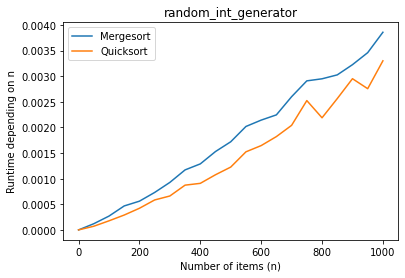

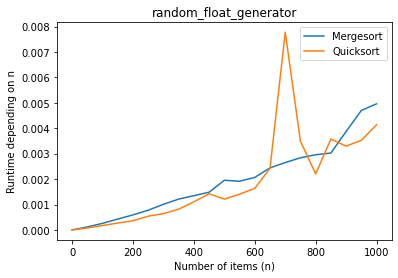

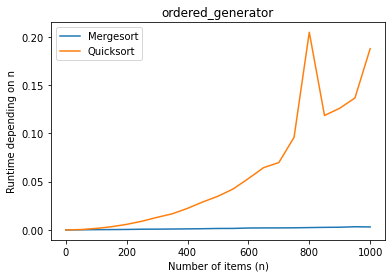

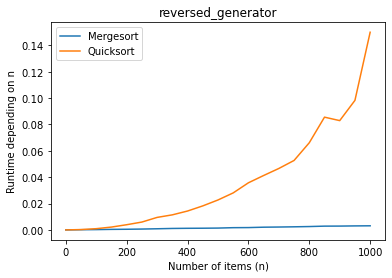

In [21]:
sys.setrecursionlimit(1000000)

gen_types = [random_int_generator, random_float_generator, ordered_generator, reversed_generator]

for generator in gen_types:
    plot_quadratic_benchmark(generator, 1001)
    plt.savefig(f'{generator.__name__}.png', bbox_inches='tight')

### Merge sort vs combined merge sort

In [25]:
def benchmark_quadratic(gen_type, list_size):
    """ Returns the time for given list type and return a dictionary with the results. """
    
    mergesort_results = [( _ , benchmark(mergesort, gen_type(_))) 
                      for _ in range(0, list_size, 50)]
    
    mergesort_combined_results = [( _ , benchmark(mergesort_combined, gen_type(_))) 
                     for _ in range(0, list_size, 50)]
     
    all_results = {'Mergesort' : mergesort_results, 
                   'Combined mergesort' : mergesort_combined_results}
    
    return all_results

In [26]:
def plot_quadratic_benchmark(generator, list_size):
    """ Plots the runtime for the different list types. """
    
    results = benchmark_quadratic(generator, list_size)
    plt.figure()
    for typ in results:
        size, time = zip(*results[typ])
        plt.plot(size, time, label = typ)
        plt.title(generator.__name__)
        plt.xlabel('Number of items (n)')
        plt.ylabel('Runtime depending on n')
        plt.legend()

KeyboardInterrupt: 

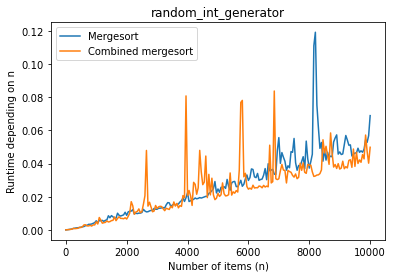

In [27]:
gen_types = [random_int_generator, random_float_generator, ordered_generator, reversed_generator]

for generator in gen_types:
    plot_quadratic_benchmark(generator, 10001)
    plt.savefig(f'{generator.__name__}.png', bbox_inches='tight')